<a href="https://colab.research.google.com/github/Roddasb/CS_5530/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-30-f84db1822aff>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prep_scores = df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']]


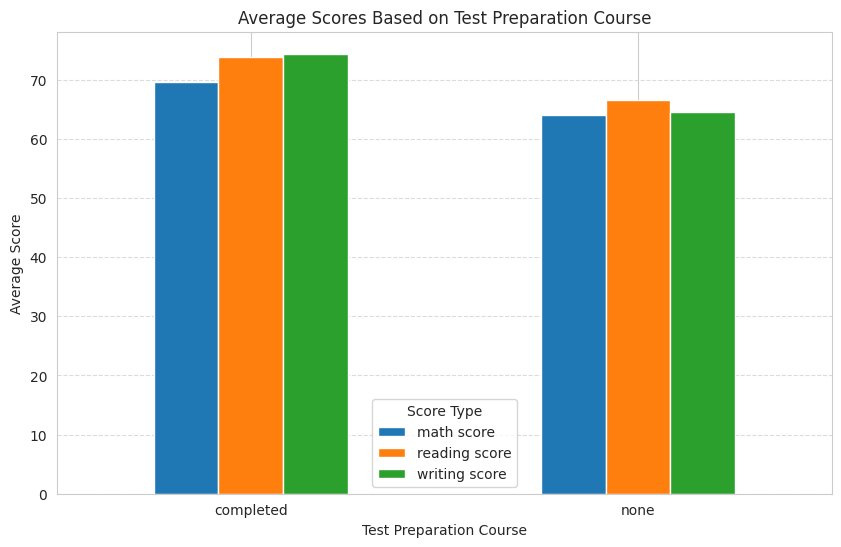

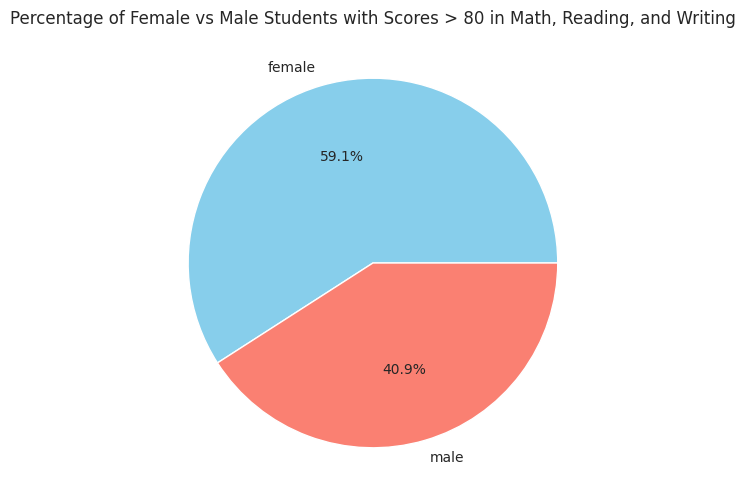

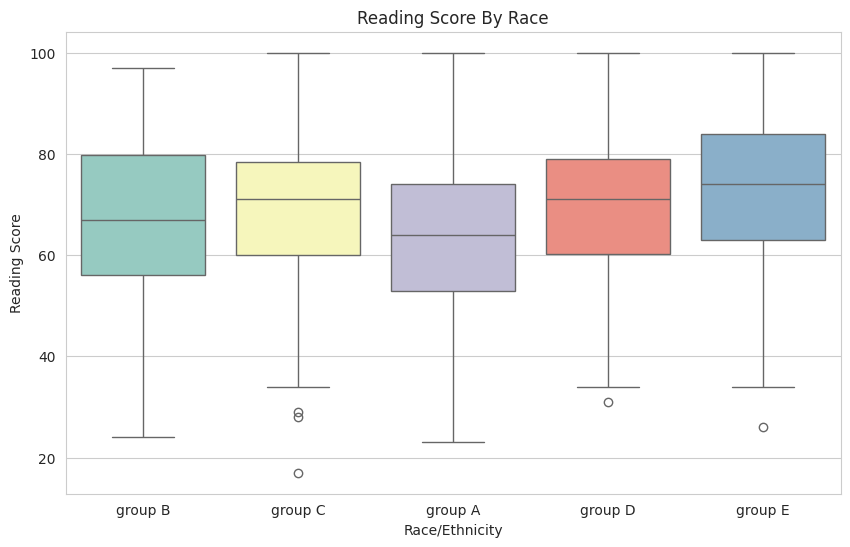

<ipython-input-30-f84db1822aff>:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


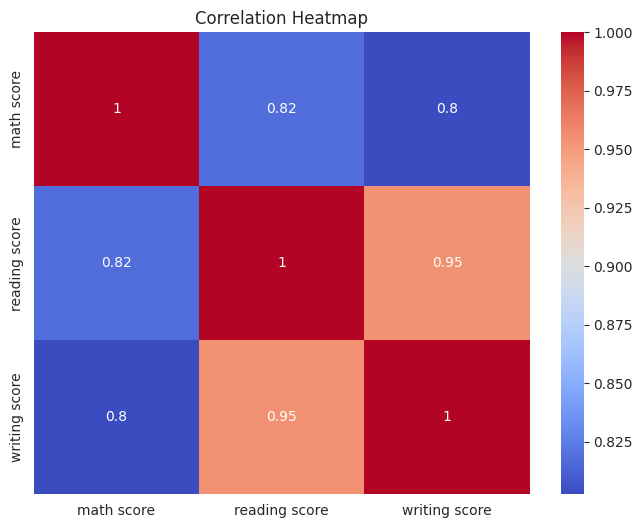

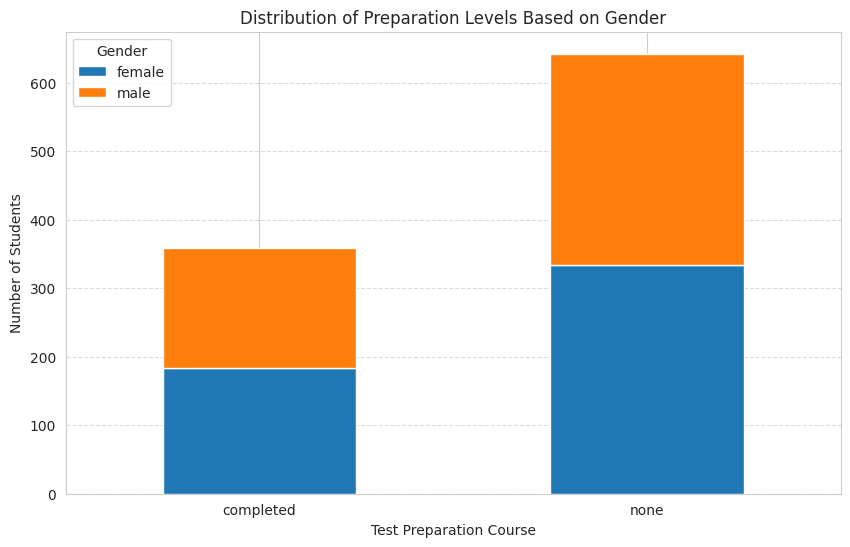

<ipython-input-30-f84db1822aff>:77: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_scores = df.groupby('race/ethnicity').mean()[['math score', 'reading score', 'writing score']].reset_index()


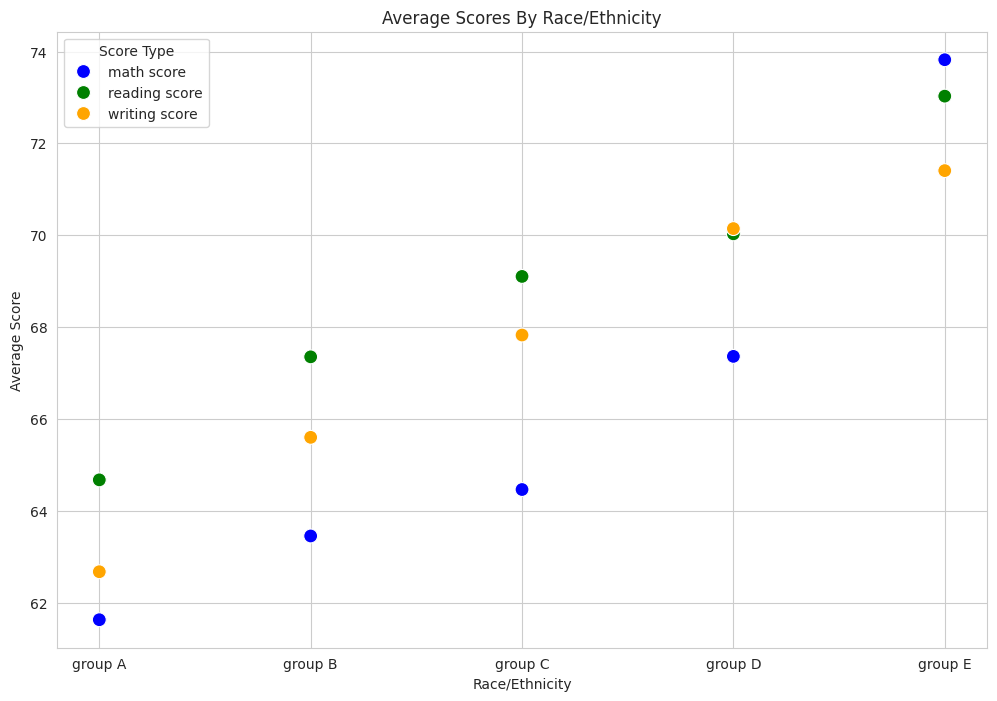

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Read the cleaned dataset
df = pd.read_csv("/content/Cleaned_StudentsPerformance.csv")


# Group the data by test preparation course and calculate the mean scores
prep_scores = df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']]

#First Visualization
# Plot bar chart
prep_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores Based on Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Score Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Second  Visualization
# Filter the dataset to include only students with scores greater than 80 in math, reading, and writing
df_filtered = df[(df['math score'] > 80) & (df['reading score'] > 80) & (df['writing score'] > 80)]

# Group the filtered dataset by gender
gender_grouped = df_filtered.groupby('gender').size()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_grouped, labels=gender_grouped.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Percentage of Female vs Male Students with Scores > 80 in Math, Reading, and Writing')
plt.show()


#Third Visualization
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='race/ethnicity', y='reading score', hue='race/ethnicity', palette='Set3', legend=False)
plt.title('Reading Score By Race')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Reading Score')
plt.show()


#Forth Visualization
# Create a heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Fifth Visualization

# Group the data by test preparation course and gender and count the number of students
prep_gender_counts = df.groupby(['test preparation course', 'gender']).size().unstack()

# Plot stacked bar chart
prep_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Preparation Levels Based on Gender')
plt.xlabel('Test Preparation Course')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





# Fifth Visualization

# Calculate average scores by race/ethnicity
avg_scores = df.groupby('race/ethnicity').mean()[['math score', 'reading score', 'writing score']].reset_index()

# Melt the dataframe to long format for seaborn scatterplot
avg_scores_melted = avg_scores.melt(id_vars='race/ethnicity', var_name='Score Type', value_name='Average Score')

# Set custom colors for each score type
colors = {'math score': 'blue', 'reading score': 'green', 'writing score': 'orange'}

# Plot scatter plots for average scores by race/ethnicity
plt.figure(figsize=(12, 8))
sns.scatterplot(data=avg_scores_melted, x='race/ethnicity', y='Average Score', hue='Score Type', palette=colors, s=100)
plt.title('Average Scores By Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.legend(title='Score Type')
plt.show()
















